## Raport dotyczący projektu Mona Lisa (rekonstrukcja zadanego obrazu przy użyciu kół)

<div style='text-align: justify;'> <div>

Mamy do dyspozycji 250 kolorowych plam w kształcie koła. 
Zadanie polega na znalezieniu optymalnego ułożenia kół oraz doboru parametrów każdego koła w ten sposób, aby powstały obrazek jak najlepiej przypominał zadany na wejściu obraz. 

Odległość między dwoma obrazkami zdefiniowaliśmy jako sumę różnic wewnątrz wszystkich pikseli pomiędzy danym obrazkiem a obrazem docelowym. 
Funkcją celu jest odległość danego obrazka od docelowego obrazu.<br/>
Rozważaliśmy także lekko zmodyfikowaną wersję powyższej funkcji celu. Aby uwzględnić większą karę za wystąpienie dużych odchyleń w kolorach, w funkcji celu zamiast różnic sumowane są kwadraty różnic na poszczególnych pikselach. 

Obrazek jest kodowany za pomocą osobnika. Każdy osobnik pamięta listę plam składających się na ten obrazek. 

Każda plama jest opisywana przez 3 parametry: kolor, współrzędne środka oraz promień. Plamy nakładane są warstwami, dlatego do każdej plamy przypisany jest także ranking. 
Świadczy on warstwie, na której znajduje się dana plama. 

Rozważaliśmy dwa sposoby nakładania na siebie plam:
- bez przeźroczystości, 
- z wykorzystaniem przeźroczystości.

Lepszy wynik uzyskaliśmy używając efektu przeźroczystości.

### Rozwiązanie problemu za pomoca algorytmu SGA

Do rozwiązania problemu wybraliśmy Simple Genetic Algorithm. 

Rozmiar populacji ustaliliśmy metodą eksperymentów na 25 osobników. Populacja dzieci składa się z 25 osobników powstałych na wskutek mutacji najlepszego osobnika z aktualnej populacji. <br/>
Do następnej iteracji przechodzą osobniki o najmniejszej wartości funkcji celu, wybrane spośród sumy aktualnej populacji oraz populacji dzieci.   

Głównym mechanizmem używanym podczas ewolucji są mutacje.  

### Szczegółowy opis mutacji 

Mutacja danego osobnika polega na wybraniu losowo jednej z jego plam. Następnie jeden losowo wybrany parametr plamy jest modyfikowany.

Zmianie mogą ulec, następujące parametry:
- kolor 
    - zmieniamy każdą składową koloru z osobna  
- promień, 
- położenie, losujemy epsilon, o który przesuwamy środek plamy, 
- przeźroczystość. 

### Wykorzystane w algorytmie mechanizmy

1. Dokładanie plam partiami:

    - Początkowo każdy osobnik otrzymuje tylko 5 plam. Następnie algorytm dostaje czas, aby znaleźć najlepsze ułożenie i dobór kolorów dla tych plam. 
    - W momencie gdy przestaje być widoczna poprawa, dorzucane są do każdego osobnika w populacji kolejne plamy. 
    
        Analizowaliśmy dorzucanie partii o rozmiarze 10 oraz dorzucanie za każdym razem jednej plamy.  
    

2. Zamrażanie plam:
    
    - Ograniczyliśmy liczbę plam, która może brać udział w ewolucji. Mutować mogę jedynie plamy z 3 ostatnio dodanych partii.  

3. Ukierunkowane dokładanie nowych plam:
    
    - Zamiast dorzucać plamy losowo, znajdujemy fragment obrazka o najmniejszej zgodności z docelowym obrazem. W to miejsce dokładamy nową partię plam.

4. Dodatkowa pula plam
    
    - Ustalamy dodatkową pulę plam, którą odblokowujemy (umożliwiamy dodanie kolejnych plam) po otrzymaniu konkretnego pułapu procentowej zgodności. Aktualnie pułap to 93%.

### Uruchomienie algorytmu 
Poniższy kod służy do uruchomienia ewolucji.

In [ ]:
from evolution import Evolution

monalisa_evolution = Evolution(num_of_generations=2, population_size=25)
best_individual, statistics = monalisa_evolution.evolve()

best_individual.show_image()

### Uzyskane wyniki 
Testowaliśmy dwa warianty naszego algorytmu, na poniższym obrazie Mona Lisy. Udało się uzyskać następujące przybliżenia.

#### Wersja algorytmu z dodawaniem po 1 plamie i dodatkową pulą plam
![Mona_Lisa_compressed.jpeg](attachments/Mona_Lisa_compressed.jpg) ![Mona_Lisa_best_result_compressed.png](attachments/Mona_Lisa_best_result_compressed.png)

![plot.png](attachments/plot.png)
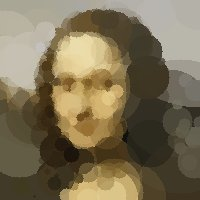
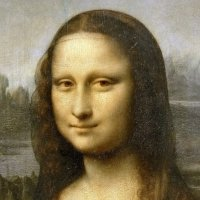
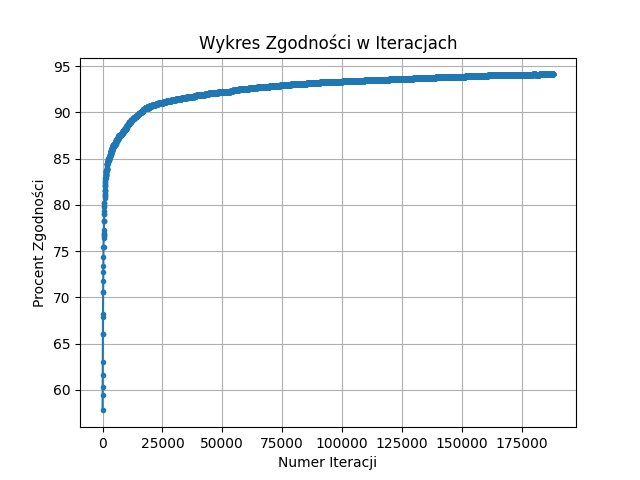

#### Wersja algorytmu z dodawaniem po 10 plam oraz zamrażaniem

![Mona_Lisa_best_result.jpg](attachments/Mona_Lisa_best_result.jpg) 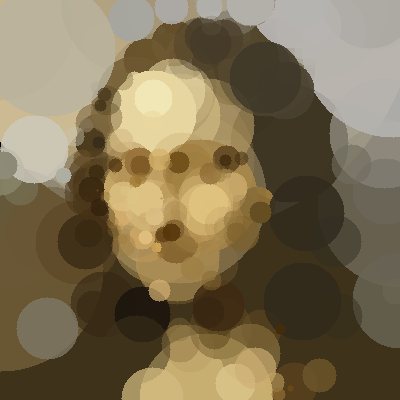 
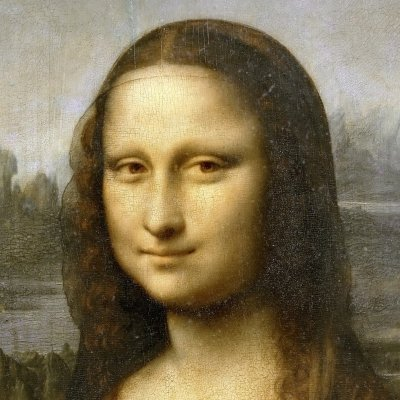